In [1]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from transformers import RobertaTokenizerFast

from plot import caption_image_beam_search, visualize_att

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
input_size = (80, 900)

img_path = 'test-imgs/valid-4.png'
model_path = 'BEST_checkpoint.pth.tar'

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

would much enough into this country


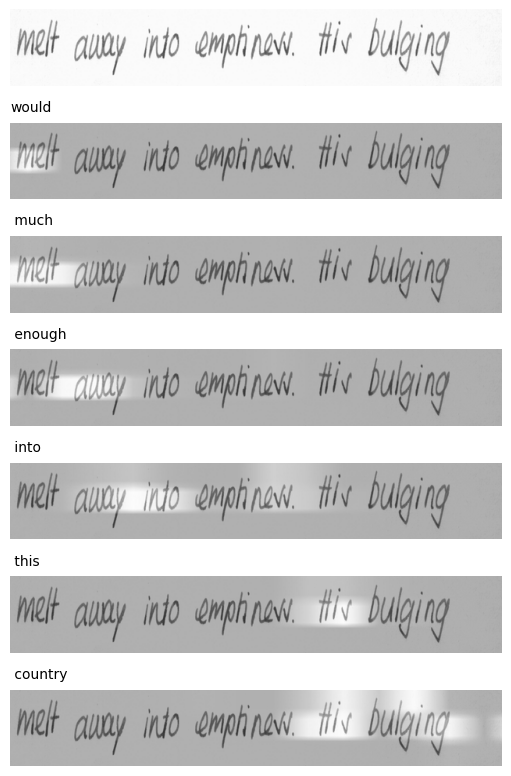

In [9]:
# Load model
checkpoint = torch.load(model_path, map_location=str(device))
decoder = checkpoint['decoder']
decoder = decoder.to(device)
decoder.eval()
encoder = checkpoint['encoder']
encoder = encoder.to(device)
encoder.eval()

# Read word map
tokenizer = RobertaTokenizerFast.from_pretrained('tokenizer/')

special_tokens = {tokenizer.bos_token_id, tokenizer.pad_token_id, tokenizer.eos_token_id, tokenizer.unk_token_id, tokenizer.mask_token_id}

totensor = transforms.ToTensor()
normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5],
                                 std=[0.229, 0.224, 0.225])
resize = transforms.Resize(input_size)

transform = transforms.Compose([resize, totensor, normalize])

# Encode, decode with attention and beam search
seq, alphas = caption_image_beam_search(encoder, decoder, img_path, tokenizer, transform, 5)

decoded_sentence = tokenizer.decode([i for i in seq if i not in special_tokens])
print(decoded_sentence)

# Visualize caption and attention of best sequence
fig = visualize_att(img_path, seq, alphas, tokenizer, False)
